In [173]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.pyplot import text
from glob import glob
import seaborn as sns
import MDAnalysis as mda
from MDAnalysis import Universe
from MDAnalysis.analysis import align
from MDAnalysis.analysis import rms
from MDAnalysis.lib.distances import distance_array
from MDAnalysis.analysis import distances
from scipy.stats import ttest_ind
from statannotations.Annotator import Annotator

In [24]:
def read_renumtxt(filepath):
    """Read the renumbering file generated by amber tleap; return pandas df"""
    df = pd.read_csv(filepath, delim_whitespace=True, names=["RES", "og_num", "RES1", "new_num"])
    df = df.astype({"og_num": int, "new_num": int})   
    return df


d = {'CYS': 'C', 'ASP': 'D', 'SER': 'S', 'GLN': 'Q', 'LYS': 'K',
     'ILE': 'I', 'PRO': 'P', 'THR': 'T', 'PHE': 'F', 'ASN': 'N', 
     'GLY': 'G', 'HID': 'H', 'LEU': 'L', 'ARG': 'R', 'TRP': 'W', 
     'ALA': 'A', 'VAL': 'V', 'GLU': 'E', 'TYR': 'Y', 'MET': 'M',
     'HIS': 'H', 'CYX': 'C', 'HSD': 'H',
    }

clrs_aa =  {'A': (0.996, 0.797, 0.598), #'#EFC3C3', #Aliphatic
            'G': (0.996, 0.797, 0.598), #'#EFC3C3',
            'I': (0.996, 0.797, 0.598), #'#EFC3C3',
            'L': (0.996, 0.797, 0.598), #'#EFC3C3',
            'P': (0.996, 0.797, 0.598), #'#EFC3C3',
            'V': (0.996, 0.797, 0.598), #'#EFC3C3',
            'F': (0.598, 0.996, 0.598), #'#b559e3', #Aromatic
            'W': (0.598, 0.996, 0.598), #'#b559e3',
            'Y': (0.598, 0.996, 0.598), #'#b559e3',
            'D': (0.398, 0.797, 0.996), # '#e35959', #Acidic 
            'E': (0.398, 0.797, 0.996), # '#e35959',
            'R': (0.996, 0.398, 0.797), #'#B1FF93', #Basic 
            'H': (0.996, 0.398, 0.797), #'#B1FF93',
            'K': (0.996, 0.398, 0.797), #'#B1FF93',
            'S': (0.797, 0.797, 0.996), #'#5979e3', #Hydroxylic - polar
            'T': (0.797, 0.797, 0.996), #'#5979e3',
            'C': (0.996,0.996,0.398), #'#59bee3', #Sulfur-containing
            'M': (0.996,0.996,0.398), #'#59bee3',
            'N': (0.797, 0.797, 0.996), #'#5979e3', #Amidic -polar
            'Q': (0.797, 0.797, 0.996), #'#5979e3',
            '-': 'white',
            'X': 'white'
           }


dfrenum = read_renumtxt('/mnt/sdb1/et2023/Navpip/2306_NEWatomistic/2306_NEW/AMB/6agf_trim_renum.txt')
dfrenum['RESshort'] = [d[i] for i in dfrenum.RES]
dfrenum['RESID'] = dfrenum['RESshort'] + dfrenum['og_num'].astype(str)
dfrenum['color'] = [clrs_aa[c] for c in dfrenum['RESshort']]

# read traj

In [248]:
adir = '/mnt/sdb1/et2023/Navpip/2306_NEWatomistic/2306_NEW/AMB/AWTX_SAP/'
bdir = '/mnt/sdb1/et2023/Navpip/2306_NEWatomistic/2306_NEW/AMB/BWTX_PCX/'
cdir = '/mnt/sdb1/et2023/Navpip/2306_NEWatomistic/2306_NEW/AMB/CWCW_SAP/'
ddir = '/mnt/sdb1/et2023/Navpip/2306_NEWatomistic/2306_NEW/AMB/DCWC_PCX/'
edir = '/mnt/sdb1/et2023/Navpip/2306_NEWatomistic/2306_NEW/AMB/EWT1_SAP/'

In [249]:
topoa = adir + 'PROT.pdb'
repstrideda1 = adir + 'rep_1/repstride.xtc'
ua1 = Universe(topoa, repstrideda1)
repstrideda2 = adir + 'rep_2/repstride.xtc'
ua2 = Universe(topoa, repstrideda2)
repstrideda3 = adir + 'rep_3/repstride.xtc'
ua3 = Universe(topoa, repstrideda3)
repstrideda4 = adir + 'rep_4/repstride.xtc'
ua4 = Universe(topoa, repstrideda4)
repstrideda5 = adir + 'rep_5/repstride.xtc'
ua5 = Universe(topoa, repstrideda5)

topob = bdir + 'PROT.pdb'
repstridedb1 = bdir + 'rep_1/repstride.xtc'
ub1 = Universe(topob, repstridedb1)
repstridedb2 = bdir + 'rep_2/repstride.xtc'
ub2 = Universe(topob, repstridedb2)
repstridedb3 = bdir + 'rep_3/repstride.xtc'
ub3 = Universe(topob, repstridedb3)
repstridedb4 = bdir + 'rep_4/repstride.xtc'
ub4 = Universe(topob, repstridedb4)
repstridedb5 = bdir + 'rep_5/repstride.xtc'
ub5 = Universe(topob, repstridedb5)

topoe = edir + 'PROT.pdb'
repstridede1 = edir + 'rep_1/repstride.xtc'
ue1 = Universe(topoe, repstridede1)
repstridede2 = edir + 'rep_2/repstride.xtc'
ue2 = Universe(topoe, repstridede2)
repstridede3 = edir + 'rep_3/repstride.xtc'
ue3 = Universe(topoe, repstridede3)
repstridede4 = edir + 'rep_4/repstride.xtc'
ue4 = Universe(topoe, repstridede4)
repstridede5 = edir + 'rep_5/repstride.xtc'
ue5 = Universe(topoe, repstridede5)

/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/topology/base.py:203: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  residx = np.zeros_like(criteria[0], dtype=np.int)
/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/coordinates/XDR.py:216: UserWarning: Reload offsets from trajectory
 ctime or size or n_atoms did not match
  warnings.warn("Reload offsets from trajectory\n "


In [44]:
xtcconcat = bdir + 'repsstrideALL_250-1500.xtc'
uconcat = Universe(topob, xtcconcat)
uconcat.trajectory

/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/coordinates/XDR.py:216: UserWarning: Reload offsets from trajectory
 ctime or size or n_atoms did not match
  warnings.warn("Reload offsets from trajectory\n "


<XTCReader /mnt/sdb1/et2023/Navpip/2306_NEWatomistic/2306_NEW/AMB/BWTX_PCX/repsstrideALL_250-1500.xtc with 713 frames of 18425 atoms>

In [100]:
cl = 'clus1cut3'
ind = [519, 28, 29, 32, 33, 34, 35, 37, 39, 41, 48, 52, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 90, 96, 97, 98, 101, 102, 104, 105, 106, 107, 110, 111, 113, 115, 116, 186, 189, 192, 195, 208, 209, 211, 213, 214, 216, 217, 218, 219, 220, 222, 224, 225, 226, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 290, 291, 292, 293, 294, 296, 297, 298, 299, 300, 301, 334, 340, 408, 409, 410, 411, 418, 420, 421, 422, 424, 425, 426, 428, 429, 431, 433, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 520, 521, 522, 523, 565, 574, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 615, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 680, 681, 683, 722, 723, 724, 725, 726, 727, 728, 729, 730, 731, 733, 760, 761, 762, 763, 764, 765, 766, 767, 768, 769, 770, 771, 772, 773, 774, 775, 776, 777, 778, 779, 780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 791, 793, 794, 795, 796, 797, 836, 837, 838, 839, 840, 841, 842, 843, 844, 845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 855, 856, 857, 858, 859, 860, 861, 862, 863, 866, 867, 868, 869, 870, 871, 872, 873, 950, 951, 952, 954, 955, 956, 957, 958, 959, 960, 961, 962, 963, 964, 965, 966, 967, 968, 979, 980, 981, 983, 984, 986, 987, 1005, 1006, 1026, 1027, 1028, 1029, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054, 1055, 1056, 1057, 1058, 1059, 1062, 1063, 1140, 1141, 1142, 1144, 1145, 1146, 1147, 1148, 1149, 1150, 1151, 1152, 1153, 1154, 1155, 1156, 1157, 1158, 1169, 1170, 1171, 1173, 1174, 1176, 1177, 1195, 1196, 1216, 1217, 1218, 1219, 1221, 1222, 1223, 1224, 1225, 1226, 1227, 1228, 1229, 1230, 1231, 1232, 1233, 1234, 1236, 1237, 1238, 1239, 1240, 1241, 1242, 1243, 1244, 1245, 1246, 1247, 1248, 1249, 1252, 1253, 1273]
protein = uconcat.select_atoms("all")
with mda.Writer(adir + 'pip' + cl + '.xtc', protein.n_atoms) as W:
    for ts in uconcat.trajectory[ind]:
        W.write(protein)

In [ ]:
pipxtc = adir + 'pip' + cl + '.xtc'
u = Universe(topoa, pipxtc)

In [250]:
print((ua1.trajectory))
print((ua2.trajectory))
print((ua3.trajectory))
print((ua4.trajectory))
print((ua5.trajectory))
print((ub1.trajectory))
print((ub2.trajectory))
print((ub3.trajectory))
print((ub4.trajectory))
print((ub5.trajectory))
print((ue1.trajectory))
print((ue2.trajectory))
print((ue3.trajectory))
print((ue4.trajectory))
print((ue5.trajectory))

<XTCReader /mnt/sdb1/et2023/Navpip/2306_NEWatomistic/2306_NEW/AMB/AWTX_SAP/rep_1/repstride.xtc with 1540 frames of 18575 atoms>
<XTCReader /mnt/sdb1/et2023/Navpip/2306_NEWatomistic/2306_NEW/AMB/AWTX_SAP/rep_2/repstride.xtc with 1549 frames of 18575 atoms>
<XTCReader /mnt/sdb1/et2023/Navpip/2306_NEWatomistic/2306_NEW/AMB/AWTX_SAP/rep_3/repstride.xtc with 1551 frames of 18575 atoms>
<XTCReader /mnt/sdb1/et2023/Navpip/2306_NEWatomistic/2306_NEW/AMB/AWTX_SAP/rep_4/repstride.xtc with 1503 frames of 18575 atoms>
<XTCReader /mnt/sdb1/et2023/Navpip/2306_NEWatomistic/2306_NEW/AMB/AWTX_SAP/rep_5/repstride.xtc with 1543 frames of 18575 atoms>
<XTCReader /mnt/sdb1/et2023/Navpip/2306_NEWatomistic/2306_NEW/AMB/BWTX_PCX/rep_1/repstride.xtc with 1540 frames of 18425 atoms>
<XTCReader /mnt/sdb1/et2023/Navpip/2306_NEWatomistic/2306_NEW/AMB/BWTX_PCX/rep_2/repstride.xtc with 1548 frames of 18425 atoms>
<XTCReader /mnt/sdb1/et2023/Navpip/2306_NEWatomistic/2306_NEW/AMB/BWTX_PCX/rep_3/repstride.xtc with 1536

# RMSD

In [256]:
def plot_rmsd_panel(sel, title, ua1, ua2, ua3, ua4, ua5, aaa):
    roller = 1 
    st = 10 
    c_alphas = ua1.select_atoms(sel)
    Ra1 = rms.RMSD(c_alphas).run(step=st)
    dfrmsda1 = pd.DataFrame(Ra1.rmsd,
                      columns=['Frame', 'Time (ns)', 'loop'])
    dfrmsda1['rep'] = 'repa1'
    dfrmsda1['rolling'] = dfrmsda1['loop'].rolling(roller).mean()
    c_alphas = ua2.select_atoms(sel)
    Ra2 = rms.RMSD(c_alphas).run(step=st)
    dfrmsda2 = pd.DataFrame(Ra2.rmsd,
                      columns=['Frame', 'Time (ns)', 'loop'])
    dfrmsda2['rep'] = 'repa2'
    dfrmsda2['rolling'] = dfrmsda2['loop'].rolling(roller).mean()
    c_alphas = ua3.select_atoms(sel)
    Ra3 = rms.RMSD(c_alphas).run(step=st)
    dfrmsda3 = pd.DataFrame(Ra3.rmsd,
                      columns=['Frame', 'Time (ns)', 'loop'])
    dfrmsda3['rep'] = 'repa3'
    dfrmsda3['rolling'] = dfrmsda3['loop'].rolling(roller).mean()
    c_alphas = ua4.select_atoms(sel)
    Ra4 = rms.RMSD(c_alphas).run(step=st)
    dfrmsda4 = pd.DataFrame(Ra4.rmsd,
                      columns=['Frame', 'Time (ns)', 'loop'])
    dfrmsda4['rep'] = 'repa4'
    dfrmsda4['rolling'] = dfrmsda4['loop'].rolling(roller).mean()
    c_alphas = ua5.select_atoms(sel)
    Ra5 = rms.RMSD(c_alphas).run(step=st)
    dfrmsda5 = pd.DataFrame(Ra5.rmsd,
                      columns=['Frame', 'Time (ns)', 'loop'])
    dfrmsda5['rep'] = 'repa5'
    dfrmsda5['rolling'] = dfrmsda5['loop'].rolling(roller).mean()

    dfrmsd = pd.concat([dfrmsda1, dfrmsda2, dfrmsda3, dfrmsda4, dfrmsda5], axis=0)
    
    sns.lineplot(data=dfrmsd.reset_index(drop=True), x='Frame', y='rolling', hue='rep', ax=aaa)
#     aaa.set_title(title)
    aaa.get_legend().remove()
    aaa.set_ylabel("RMSD (Å)")
    aaa.set_xlabel("Time (ns)")
    aaa.set_xlim(0, 1500)
    sns.despine()

In [257]:
adir+'../rmsd.png'
pdir = '/mnt/sdb1/et2023/Navpip/2306_NEWatomistic/2306_NEW/AMB/'

/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:521: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(group), dtype=np.bool)
/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:521: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(group), dtype=np.bool)
/h

/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/hom

/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/hom

/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/hom

/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:521: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(group), dtype=np.bool)


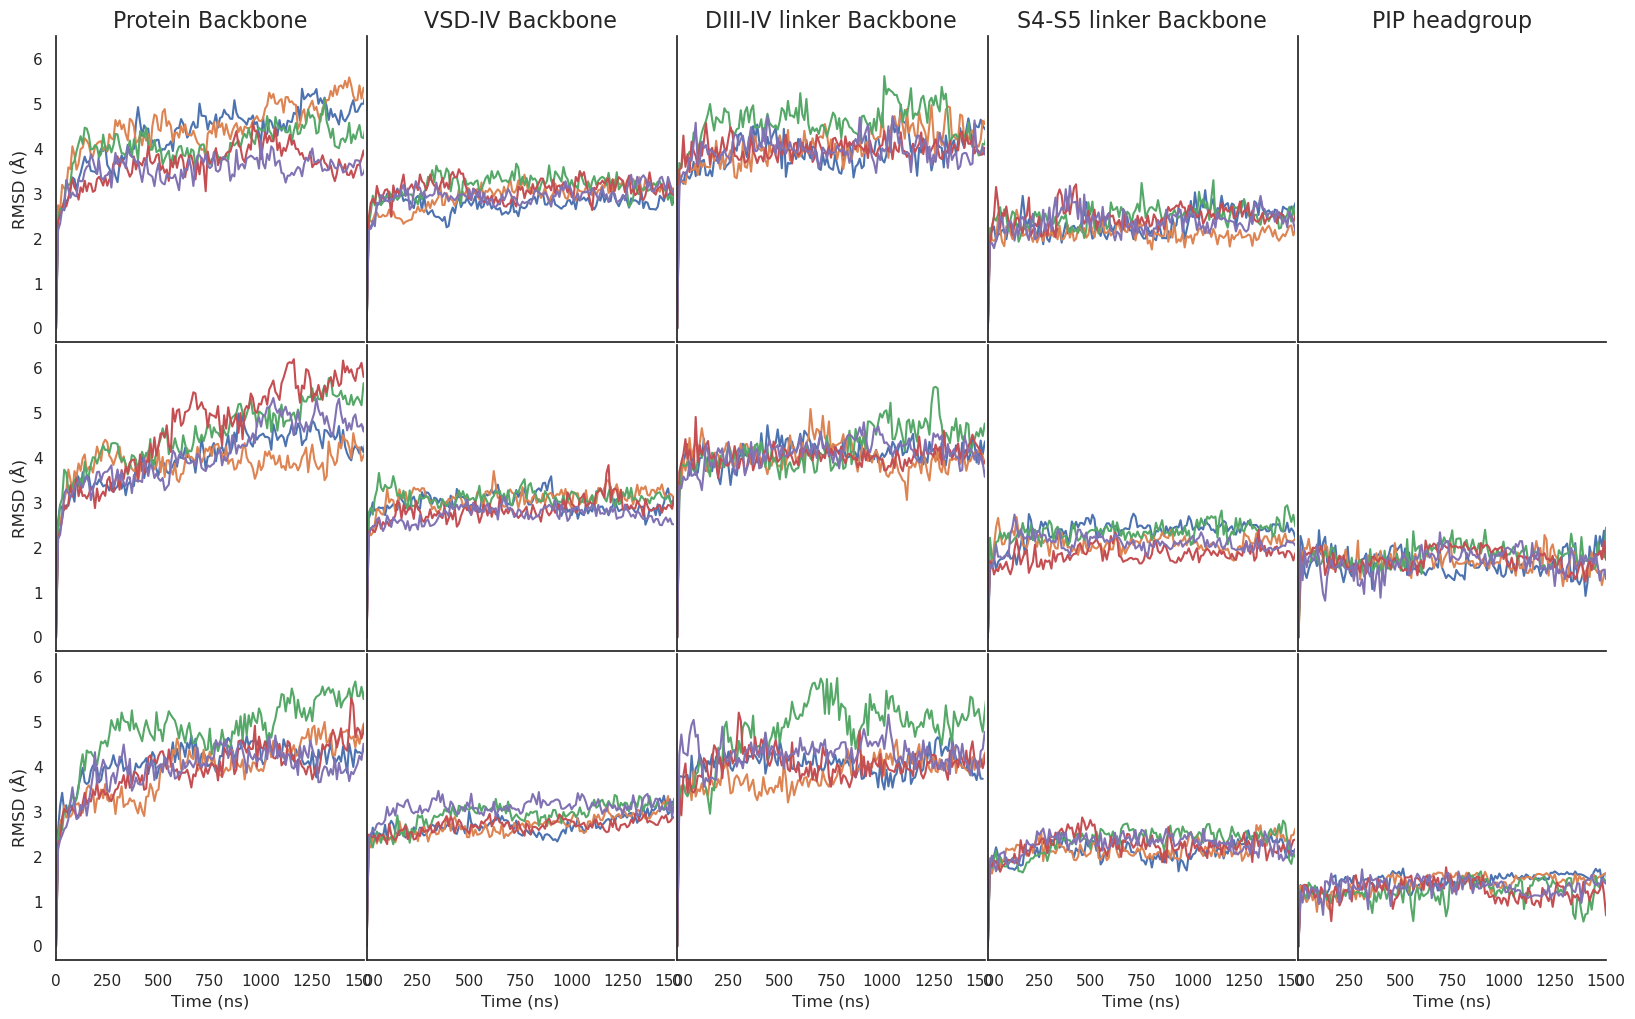

In [258]:
bbsel = "name CA C O N"
vsd4sel = "resid 867-987"# and " + bbsel
d34sel = "resid 830-866"# and " + bbsel
s45sel = "resid 988-1002"# and " + bbsel
pipsel = "resname APH"

sns.set_style("white")

fig, ax = plt.subplots(3,5, figsize=(20, 12), sharey=True, sharex=True)

plot_rmsd_panel(bbsel, "protein backbone -PIP2", ub1, ub2, ub3, ub4, ub5, ax[0,0])
plot_rmsd_panel(bbsel, "protein backbone +PIP2", ua1, ua2, ua3, ua4, ua5, ax[1,0])
plot_rmsd_panel(bbsel, "protein backbone +PIP1", ue1, ue2, ue3, ue4, ue5, ax[2,0])

plot_rmsd_panel(vsd4sel, "VSD-IV -PIP2", ub1, ub2, ub3, ub4, ub5, ax[0,1])
plot_rmsd_panel(vsd4sel, "VSD-IV +PIP2", ua1, ua2, ua3, ua4, ua5, ax[1,1])
plot_rmsd_panel(vsd4sel, "VSD-IV +PIP1", ue1, ue2, ue3, ue4, ue5, ax[2,1])

plot_rmsd_panel(d34sel, "DIII-IV linker -PIP2", ub1, ub2, ub3, ub4, ub5, ax[0,2])
plot_rmsd_panel(d34sel, "DIII-IV linker +PIP2", ua1, ua2, ua3, ua4, ua5, ax[1,2])
plot_rmsd_panel(d34sel, "DIII-IV linker +PIP1", ue1, ue2, ue3, ue4, ue5, ax[2,2])

plot_rmsd_panel(s45sel, "S4-S5 linker -PIP2", ub1, ub2, ub3, ub4, ub5, ax[0,3])
plot_rmsd_panel(s45sel, "S4-S5 linker +PIP2", ua1, ua2, ua3, ua4, ua5, ax[1,3])
plot_rmsd_panel(s45sel, "S4-S5 linker +PIP1", ue1, ue2, ue3, ue4, ue5, ax[2,3])

plot_rmsd_panel(pipsel, "PIP2 headgroup", ua1, ua2, ua3, ua4, ua5, ax[1,4])
plot_rmsd_panel(pipsel, "PIP1 headgroup", ue1, ue2, ue3, ue4, ue5, ax[2,4])


plt.subplots_adjust(hspace=0.01, wspace=0.01)
ax[0,0].set_title("Protein Backbone", fontsize=16)
ax[0,1].set_title("VSD-IV Backbone", fontsize=16)
ax[0,2].set_title("DIII-IV linker Backbone", fontsize=16)
ax[0,3].set_title("S4-S5 linker Backbone", fontsize=16)
ax[0,4].set_title("PIP headgroup", fontsize=16)

plt.savefig(pdir+'rmsd_PIP1_PIP2.png', dpi=500, bbox_inches='tight')

# RMSF

In [97]:
def rmsf2df_allres(strtfr):
    c_alphas_a = ua1.select_atoms('name CA')
    rmsf_a1 = rms.RMSF(c_alphas_a).run(start=strtfr)
    c_alphas_a = ua2.select_atoms('name CA')
    rmsf_a2 = rms.RMSF(c_alphas_a).run(start=strtfr)
    c_alphas_a = ua3.select_atoms('name CA')
    rmsf_a3 = rms.RMSF(c_alphas_a).run(start=strtfr)
    c_alphas_a = ua4.select_atoms('name CA')
    rmsf_a4 = rms.RMSF(c_alphas_a).run(start=strtfr)
    c_alphas_a = ua5.select_atoms('name CA')
    rmsf_a5 = rms.RMSF(c_alphas_a).run(start=strtfr)

    c_alphas_a = ub1.select_atoms('name CA')
    rmsf_b1 = rms.RMSF(c_alphas_a).run(start=strtfr)
    c_alphas_a = ub2.select_atoms('name CA')
    rmsf_b2 = rms.RMSF(c_alphas_a).run(start=strtfr)
    c_alphas_a = ub3.select_atoms('name CA')
    rmsf_b3 = rms.RMSF(c_alphas_a).run(start=strtfr)
    c_alphas_a = ub4.select_atoms('name CA')
    rmsf_b4 = rms.RMSF(c_alphas_a).run(start=strtfr)
    c_alphas_a = ub5.select_atoms('name CA')
    rmsf_b5 = rms.RMSF(c_alphas_a).run(start=strtfr)

    dfrmsf1 = dfrenum.copy()
    dfrmsf1['rmsf'] = rmsf_a1.rmsf
    dfrmsf1['rep'] = 'repa1'
    dfrmsf2 = dfrenum.copy()
    dfrmsf2['rmsf'] = rmsf_a2.rmsf
    dfrmsf2['rep'] = 'repa2'
    dfrmsf3 = dfrenum.copy()
    dfrmsf3['rmsf'] = rmsf_a3.rmsf
    dfrmsf3['rep'] = 'repa3'
    dfrmsf4 = dfrenum.copy()
    dfrmsf4['rmsf'] = rmsf_a4.rmsf
    dfrmsf4['rep'] = 'repa4'
    dfrmsf5 = dfrenum.copy()
    dfrmsf5['rmsf'] = rmsf_a5.rmsf
    dfrmsf5['rep'] = 'repa5'
    dfrmsf_a = pd.concat([dfrmsf1, dfrmsf2, dfrmsf3, dfrmsf4, dfrmsf5 ])

    dfrmsf1 = dfrenum.copy()
    dfrmsf1['rmsf'] = rmsf_b1.rmsf
    dfrmsf1['rep'] = 'repb1'
    dfrmsf2 = dfrenum.copy()
    dfrmsf2['rmsf'] = rmsf_b2.rmsf
    dfrmsf2['rep'] = 'repb2'
    dfrmsf3 = dfrenum.copy()
    dfrmsf3['rmsf'] = rmsf_b3.rmsf
    dfrmsf3['rep'] = 'repb3'
    dfrmsf4 = dfrenum.copy()
    dfrmsf4['rmsf'] = rmsf_b4.rmsf
    dfrmsf4['rep'] = 'repb4'
    dfrmsf5 = dfrenum.copy()
    dfrmsf5['rmsf'] = rmsf_b5.rmsf
    dfrmsf5['rep'] = 'repb5'
    dfrmsf_b = pd.concat([dfrmsf1, dfrmsf2, dfrmsf3, dfrmsf4, dfrmsf5 ])
    
    dfrmsf_a['PIP'] = '+PIP2'
    dfrmsf_b['PIP'] = '-PIP1/2'
    dfrmsf = pd.concat([dfrmsf_a, dfrmsf_b])
    
    return dfrmsf 

In [96]:
def rmsf2df_allres_E(strtfr):
    c_alphas_a = ue1.select_atoms('name CA')
    rmsf_a1 = rms.RMSF(c_alphas_a).run(start=strtfr)
    c_alphas_a = ue2.select_atoms('name CA')
    rmsf_a2 = rms.RMSF(c_alphas_a).run(start=strtfr)
    c_alphas_a = ue3.select_atoms('name CA')
    rmsf_a3 = rms.RMSF(c_alphas_a).run(start=strtfr)
    c_alphas_a = ue4.select_atoms('name CA')
    rmsf_a4 = rms.RMSF(c_alphas_a).run(start=strtfr)
    c_alphas_a = ue5.select_atoms('name CA')
    rmsf_a5 = rms.RMSF(c_alphas_a).run(start=strtfr)

    c_alphas_a = ub1.select_atoms('name CA')
    rmsf_b1 = rms.RMSF(c_alphas_a).run(start=strtfr)
    c_alphas_a = ub2.select_atoms('name CA')
    rmsf_b2 = rms.RMSF(c_alphas_a).run(start=strtfr)
    c_alphas_a = ub3.select_atoms('name CA')
    rmsf_b3 = rms.RMSF(c_alphas_a).run(start=strtfr)
    c_alphas_a = ub4.select_atoms('name CA')
    rmsf_b4 = rms.RMSF(c_alphas_a).run(start=strtfr)
    c_alphas_a = ub5.select_atoms('name CA')
    rmsf_b5 = rms.RMSF(c_alphas_a).run(start=strtfr)

    dfrmsf1 = dfrenum.copy()
    dfrmsf1['rmsf'] = rmsf_a1.rmsf
    dfrmsf1['rep'] = 'repa1'
    dfrmsf2 = dfrenum.copy()
    dfrmsf2['rmsf'] = rmsf_a2.rmsf
    dfrmsf2['rep'] = 'repa2'
    dfrmsf3 = dfrenum.copy()
    dfrmsf3['rmsf'] = rmsf_a3.rmsf
    dfrmsf3['rep'] = 'repa3'
    dfrmsf4 = dfrenum.copy()
    dfrmsf4['rmsf'] = rmsf_a4.rmsf
    dfrmsf4['rep'] = 'repa4'
    dfrmsf5 = dfrenum.copy()
    dfrmsf5['rmsf'] = rmsf_a5.rmsf
    dfrmsf5['rep'] = 'repa5'
    dfrmsf_a = pd.concat([dfrmsf1, dfrmsf2, dfrmsf3, dfrmsf4, dfrmsf5 ])

    dfrmsf1 = dfrenum.copy()
    dfrmsf1['rmsf'] = rmsf_b1.rmsf
    dfrmsf1['rep'] = 'repb1'
    dfrmsf2 = dfrenum.copy()
    dfrmsf2['rmsf'] = rmsf_b2.rmsf
    dfrmsf2['rep'] = 'repb2'
    dfrmsf3 = dfrenum.copy()
    dfrmsf3['rmsf'] = rmsf_b3.rmsf
    dfrmsf3['rep'] = 'repb3'
    dfrmsf4 = dfrenum.copy()
    dfrmsf4['rmsf'] = rmsf_b4.rmsf
    dfrmsf4['rep'] = 'repb4'
    dfrmsf5 = dfrenum.copy()
    dfrmsf5['rmsf'] = rmsf_b5.rmsf
    dfrmsf5['rep'] = 'repb5'
    dfrmsf_b = pd.concat([dfrmsf1, dfrmsf2, dfrmsf3, dfrmsf4, dfrmsf5 ])
    
    dfrmsf_a['PIP'] = '+PIP1'
    dfrmsf_b['PIP'] = '-PIP1/2'
    dfrmsf = pd.concat([dfrmsf_a, dfrmsf_b])
    
    return dfrmsf 

In [155]:
def plot_rmsf(df, res1, res2, title, sig=True, pip='PIP2', pal=pal):
    dat = df[(df.new_num > res1) & (df.new_num < res2)]
    
    t=[]
    for i in np.unique(dat['og_num']):
        vdf = dat[dat['og_num']==i]
        t.append(ttest_ind(vdf[vdf['PIP']=='+'+pip]['rmsf'], vdf[vdf['PIP']=='-PIP1/2']['rmsf'])[1])

    dfstat=pd.DataFrame(t,index=np.unique(dat['og_num']), columns=['stat'])
    # ' '.join(list(df[df['stat']<0.05].index.astype(str)))
#     sig = list(df[df['stat']<0.05].index.astype(int))
    
    if sig:
        dat2 = dat[dat["og_num"].isin(list(dfstat[dfstat['stat']<0.05].index))]
    else:
        dat2 = dat 

#     sns.set(font_scale=2.5)
    sns.set_theme(style="whitegrid")

    fig, ax = plt.subplots(figsize=(len(dat2[dat2['PIP']=='-PIP1/2'])/7, 5))

    sns.barplot(
        data=dat2, #kind="bar",
        x="RESID", y="rmsf", ax=ax, hue="PIP",
        alpha=.8, palette=pal, errorbar='se'
    )
    sns.despine(left=True)
    plt.xlabel('', fontsize=22)
    plt.ylabel('RMSF ($\AA$)', fontsize=22)
    plt.title(title, fontsize=22)
    plt.legend(loc="upper right", ncol=1, columnspacing=0.4, frameon=False, fontsize=16)
    plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
    ax.tick_params(axis='both', labelsize=22)  # Set the tick label size
#     for tl in ax.get_xticklabels():
#         txt = tl.get_text()
#     #     print(txt, type(resnew.set_index('resname').loc[txt]['color']))
#         if type(dat.set_index('RESID').loc[txt]['color']) == str:
#             tl.set_backgroundcolor(dat.set_index('RESID').loc[txt]['color'])
#         else:
#             tl.set_backgroundcolor(dat.set_index('RESID').loc[txt]['color'].unique()[0])
            
    

In [245]:
def plot_rmsf_signif(df, res1, res2, title, sig=True, pip='PIP2', pal=pal):
    dat = df[(df.new_num > res1) & (df.new_num < res2)]
    
#     fig, ax = plt.subplots(figsize=(len(dat[dat['PIP']=='-PIP1/2'])/7, 5))
    
#     x = "RESID"
#     y = "rmsf"
# #     order = ['Sun', 'Thur', 'Fri', 'Sat']
#     ax = sns.barplot(data=dat, x=x, y=y, #order=order, 
#                      hue="PIP", alpha=.8, palette=pal, errorbar='se')
#     test_results = Annotator(ax, [[("R1463", "-PIP1/2"), ("R1463", "+PIP1")]], 
#                              data=dat, x=x, y=y,
#                            test='t-test_ind', text_format='star',
#                            loc='outside', verbose=2)

# #     sns.set(font_scale=2.5)
#     sns.set_theme(style="whitegrid")

#     sns.despine(left=True)
#     plt.xlabel('', fontsize=22)
#     plt.ylabel('RMSF ($\AA$)', fontsize=22)
#     plt.title(title, fontsize=22)
#     plt.legend(loc="upper right", ncol=1, columnspacing=0.4, frameon=False, fontsize=16)
#     plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
#     ax.tick_params(axis='both', labelsize=22)  # Set the tick label size
#     for tl in ax.get_xticklabels():
#         txt = tl.get_text()
#     #     print(txt, type(resnew.set_index('resname').loc[txt]['color']))
#         if type(dat.set_index('RESID').loc[txt]['color']) == str:
#             tl.set_backgroundcolor(dat.set_index('RESID').loc[txt]['color'])
#         else:
#             tl.set_backgroundcolor(dat.set_index('RESID').loc[txt]['color'].unique()[0])

    hue_plot_params = {
        'data': dat,
        'x': 'RESID',
        'y': 'rmsf',
#         "order": subcat_order,
        "hue": "PIP",
#         "hue_order": states_order,
        "palette": pal
    }
    
    pairs = []
    for resid in dat.RESID.unique():
        l = [(resid, dat.PIP.unique()[0]), (resid, dat.PIP.unique()[1])]
        pairs.append(l)

#     with sns.plotting_context("whitegrid", font_scale = 1.8):
    # Create new plot
    fig, ax = plt.subplots(figsize=(len(dat[dat['PIP']=='-PIP1/2'])/7, 5))

    # Plot with seaborn
    ax = sns.barplot(ax=ax, **hue_plot_params, 
                    alpha=.8, errorbar='se')

    # Add annotations
    annotator = Annotator(ax, pairs, **hue_plot_params)
    annotator.configure(test="t-test_ind").apply_and_annotate()
#         annotator.configure(test="t-test_ind", comparisons_correction="bonferroni")
#         _, corrected_results = annotator.apply_and_annotate()
        
    print(pairs)
    sns.despine(left=True)
    plt.xlabel('', fontsize=22)
    plt.ylabel('RMSF ($\AA$)', fontsize=22)
    plt.title(title, fontsize=22)
    plt.legend(loc="upper right", ncol=1, columnspacing=0.4, frameon=False, fontsize=16)
    plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
    ax.tick_params(axis='both', labelsize=22)  # Set the tick label size
    

In [209]:
pairs = []
for resid in dat.RESID:
    l = [(resid, dat.PIP.unique()[0]), (resid, dat.PIP.unique()[1])]
    pairs.append(l)
    
pair

[[('V119', '+PIP1'), ('V119', '-PIP1/2')],
 [('V120', '+PIP1'), ('V120', '-PIP1/2')],
 [('R121', '+PIP1'), ('R121', '-PIP1/2')],
 [('R122', '+PIP1'), ('R122', '-PIP1/2')],
 [('G123', '+PIP1'), ('G123', '-PIP1/2')],
 [('A124', '+PIP1'), ('A124', '-PIP1/2')],
 [('I125', '+PIP1'), ('I125', '-PIP1/2')],
 [('K126', '+PIP1'), ('K126', '-PIP1/2')],
 [('V127', '+PIP1'), ('V127', '-PIP1/2')],
 [('L128', '+PIP1'), ('L128', '-PIP1/2')],
 [('I129', '+PIP1'), ('I129', '-PIP1/2')],
 [('H130', '+PIP1'), ('H130', '-PIP1/2')],
 [('A131', '+PIP1'), ('A131', '-PIP1/2')],
 [('L132', '+PIP1'), ('L132', '-PIP1/2')],
 [('F133', '+PIP1'), ('F133', '-PIP1/2')],
 [('S134', '+PIP1'), ('S134', '-PIP1/2')],
 [('M135', '+PIP1'), ('M135', '-PIP1/2')],
 [('F136', '+PIP1'), ('F136', '-PIP1/2')],
 [('I137', '+PIP1'), ('I137', '-PIP1/2')],
 [('M138', '+PIP1'), ('M138', '-PIP1/2')],
 [('I139', '+PIP1'), ('I139', '-PIP1/2')],
 [('T140', '+PIP1'), ('T140', '-PIP1/2')],
 [('I141', '+PIP1'), ('I141', '-PIP1/2')],
 [('L142', 

In [207]:
dat.PIP.unique()[0]

'+PIP1'

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

L1472_+PIP2 vs. L1472_-PIP1/2: t-test independent samples, P_val:1.501e-02 t=-3.085e+00
F1473_+PIP2 vs. F1473_-PIP1/2: t-test independent samples, P_val:1.914e-02 t=-2.925e+00
A1474_+PIP2 vs. A1474_-PIP1/2: t-test independent samples, P_val:5.666e-02 t=-2.226e+00
L1475_+PIP2 vs. L1475_-PIP1/2: t-test independent samples, P_val:5.338e-02 t=-2.264e+00
M1476_+PIP2 vs. M1476_-PIP1/2: t-test independent samples, P_val:4.029e-02 t=-2.444e+00
L1471_+PIP2 vs. L1471_-PIP1/2: t-test independent samples, P_val:1.028e-01 t=-1.842e+00
G1464_+PIP2 vs. G1464_-PIP1/2: t-test independent samples, P_val:1.641e-01 t=-1.532e+00
R1463_+PIP2 vs. R1463_-PIP1/2: t-test independent samples, P_val:1.778e-01 t=-1.478e+00
A1465_+PIP2 vs. A1465_-PIP1/2: t-test independent samples, P_val:4.557e-02 t=-2.365e+00
K1466_+PIP2 vs. K1466_-PIP1

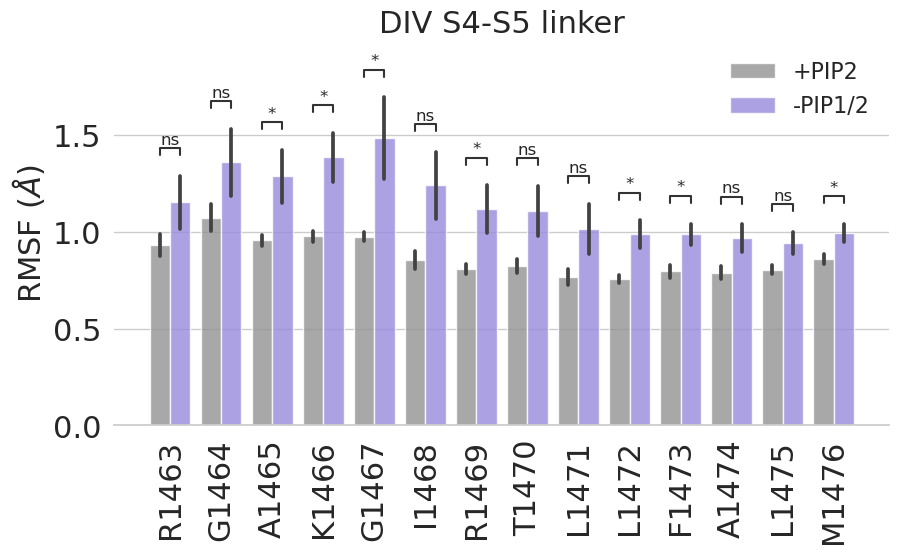

In [255]:
pal = [
#     "#7EEAC4", 
    "#929292",
    "#8E7EEA",
]
plot_rmsf_signif(datBA, 987, 1002, "DIV S4-S5 linker", sig=False, pip='PIP2', pal=pal)
# plt.ylim(0, 1.7)
# plt.savefig('s4-s5_rmsf_sig.png', dpi=500, bbox_inches='tight')

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

L1472_+PIP1 vs. L1472_-PIP1/2: t-test independent samples, P_val:2.779e-01 t=-1.164e+00
F1473_+PIP1 vs. F1473_-PIP1/2: t-test independent samples, P_val:5.230e-01 t=-6.679e-01
A1474_+PIP1 vs. A1474_-PIP1/2: t-test independent samples, P_val:1.744e-01 t=-1.490e+00
L1475_+PIP1 vs. L1475_-PIP1/2: t-test independent samples, P_val:9.994e-02 t=-1.860e+00
M1476_+PIP1 vs. M1476_-PIP1/2: t-test independent samples, P_val:1.078e-01 t=-1.811e+00
L1471_+PIP1 vs. L1471_-PIP1/2: t-test independent samples, P_val:1.383e-01 t=-1.646e+00
G1464_+PIP1 vs. G1464_-PIP1/2: t-test independent samples, P_val:3.416e-01 t=-1.011e+00
R1463_+PIP1 vs. R1463_-PIP1/2: t-test independent samples, P_val:5.335e-01 t=-6.507e-01
A1465_+PIP1 vs. A1465_-PIP1/2: t-test independent samples, P_val:1.590e-01 t=-1.553e+00
K1466_+PIP1 vs. K1466_-PIP1

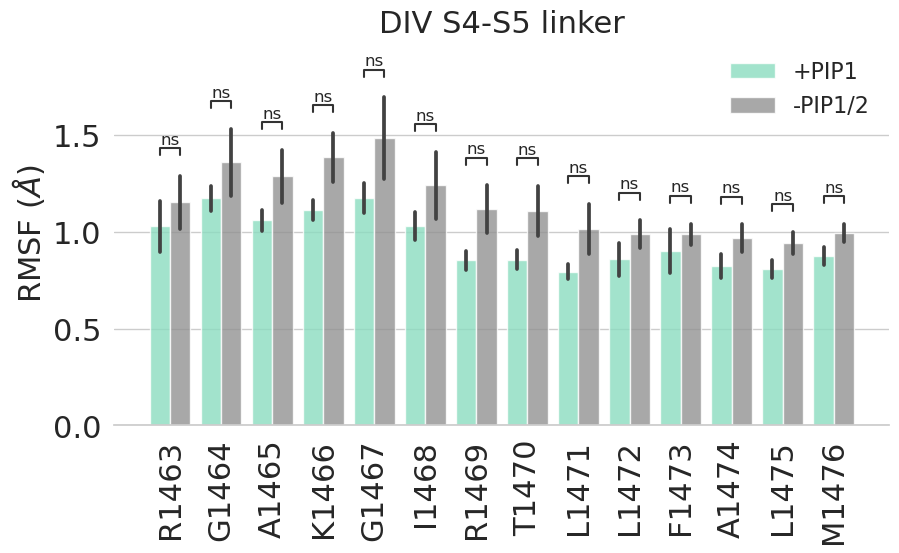

In [254]:
pal = ["#7EEAC4", 
       "#929292",
      ]
plot_rmsf_signif(datBE, 987, 1002, "DIV S4-S5 linker", sig=False, pip='PIP1', pal=pal)
# plt.ylim(0, 1.7)
# plt.savefig('s4-s5_rmsf_sig.png', dpi=500, bbox_inches='tight')

In [197]:
dat.RESID

0        V119
1        V120
2        R121
3        R122
4        G123
        ...  
1125    F1601
1126    N1602
1127    V1603
1128    A1604
1129    T1605
Name: RESID, Length: 11300, dtype: object

## +PIP1

In [251]:
#dat = dfrmsf[(dfrmsf.new_num > 845) & (dfrmsf.new_num < 870)]

datBE = rmsf2df_allres_E(250)

/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:521: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(group), dtype=np.bool)


In [218]:
pal = ["#7EEAC4", 
       "#929292",
       
      ]

In [101]:
datBE

,RES,og_num,RES1,new_num,RESshort,RESID,color,rmsf,rep,PIP
0,VAL,119,VAL,1,V,V119,"(0.996, 0.797, 0.598)",5.627583,repa1,+PIP1
1,VAL,120,VAL,2,V,V120,"(0.996, 0.797, 0.598)",5.175174,repa1,+PIP1
2,ARG,121,ARG,3,R,R121,"(0.996, 0.398, 0.797)",4.916669,repa1,+PIP1
3,ARG,122,ARG,4,R,R122,"(0.996, 0.398, 0.797)",5.057755,repa1,+PIP1
4,GLY,123,GLY,5,G,G123,"(0.996, 0.797, 0.598)",4.968124,repa1,+PIP1
...,...,...,...,...,...,...,...,...,...,...
1125,PHE,1601,PHE,1126,F,F1601,"(0.598, 0.996, 0.598)",1.519246,repb5,-PIP1/2
1126,ASN,1602,ASN,1127,N,N1602,"(0.797, 0.797, 0.996)",2.840220,repb5,-PIP1/2
1127,VAL,1603,VAL,1128,V,V1603,"(0.996, 0.797, 0.598)",5.305798,repb5,-PIP1/2
1128,ALA,1604,ALA,1129,A,A1604,"(0.996, 0.797, 0.598)",6.668315,repb5,-PIP1/2


ValueError: min() arg is an empty sequence

/home/elaine/anaconda3/lib/python3.8/site-packages/matplotlib/_tight_bbox.py:67: RuntimeWarning: divide by zero encountered in double_scalars
  fig.patch.set_bounds(x0 / w1, y0 / h1,
/home/elaine/anaconda3/lib/python3.8/site-packages/matplotlib/_tight_bbox.py:68: RuntimeWarning: divide by zero encountered in double_scalars
  fig.bbox.width / w1, fig.bbox.height / h1)
/home/elaine/anaconda3/lib/python3.8/site-packages/matplotlib/patches.py:736: RuntimeWarning: invalid value encountered in double_scalars
  x1 = self.convert_xunits(self._x0 + self._width)
/home/elaine/anaconda3/lib/python3.8/site-packages/matplotlib/transforms.py:2046: RuntimeWarning: invalid value encountered in double_scalars
  self._mtx[0, 2] += tx


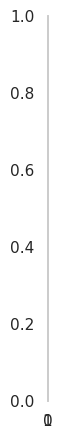

In [252]:
plot_rmsf(datBE, 830, 866, "DIII-IV linker", sig=True, pip='PIP1')
# plt.legend().remove()
# plt.ylim(0, 1.7)

# plt.savefig('d3-4_rmsf_sig.png', dpi=500, bbox_inches='tight')

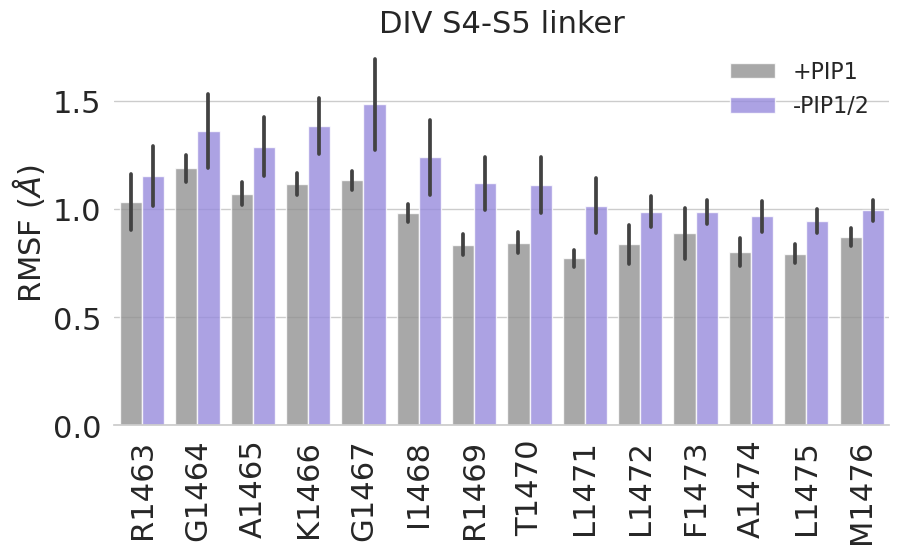

In [171]:
plot_rmsf(datBE, 987, 1002, "DIV S4-S5 linker", sig=False, pip='PIP1')
# plt.ylim(0, 1.7)
# plt.savefig('s4-s5_rmsf_sig.png', dpi=500, bbox_inches='tight')

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04



ValueError: box_pairs contains an invalid box pair.

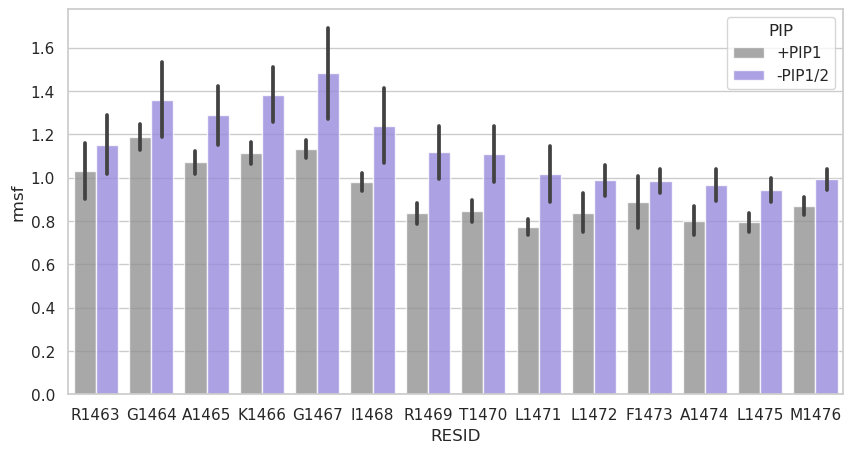

In [175]:
plot_rmsf_signif(datBE, 987, 1002, "DIV S4-S5 linker", sig=False, pip='PIP1')
# plt.ylim(0, 1.7)
# plt.savefig('s4-s5_rmsf_sig.png', dpi=500, bbox_inches='tight')

ValueError: min() arg is an empty sequence

/home/elaine/anaconda3/lib/python3.8/site-packages/matplotlib/_tight_bbox.py:67: RuntimeWarning: divide by zero encountered in double_scalars
  fig.patch.set_bounds(x0 / w1, y0 / h1,
/home/elaine/anaconda3/lib/python3.8/site-packages/matplotlib/_tight_bbox.py:68: RuntimeWarning: divide by zero encountered in double_scalars
  fig.bbox.width / w1, fig.bbox.height / h1)
/home/elaine/anaconda3/lib/python3.8/site-packages/matplotlib/patches.py:736: RuntimeWarning: invalid value encountered in double_scalars
  x1 = self.convert_xunits(self._x0 + self._width)
/home/elaine/anaconda3/lib/python3.8/site-packages/matplotlib/transforms.py:2046: RuntimeWarning: invalid value encountered in double_scalars
  self._mtx[0, 2] += tx


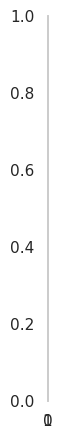

In [119]:
plot_rmsf(datBE, 830, 866, "DIII-IV linker", sig=True, pip='PIP1')
# plt.legend().remove()
# plt.ylim(0, 1.7)

# plt.savefig('d3-4_rmsf_sig.png', dpi=500, bbox_inches='tight')

ValueError: min() arg is an empty sequence

/home/elaine/anaconda3/lib/python3.8/site-packages/matplotlib/_tight_bbox.py:67: RuntimeWarning: divide by zero encountered in double_scalars
  fig.patch.set_bounds(x0 / w1, y0 / h1,
/home/elaine/anaconda3/lib/python3.8/site-packages/matplotlib/_tight_bbox.py:68: RuntimeWarning: divide by zero encountered in double_scalars
  fig.bbox.width / w1, fig.bbox.height / h1)
/home/elaine/anaconda3/lib/python3.8/site-packages/matplotlib/patches.py:736: RuntimeWarning: invalid value encountered in double_scalars
  x1 = self.convert_xunits(self._x0 + self._width)
/home/elaine/anaconda3/lib/python3.8/site-packages/matplotlib/transforms.py:2046: RuntimeWarning: invalid value encountered in double_scalars
  self._mtx[0, 2] += tx


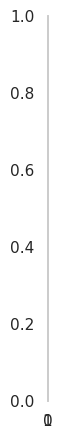

In [253]:
plot_rmsf(datBE, 987, 1002, "DIV S4-S5 linker", sig=True, pip='PIP1')
plt.ylim(0, 1.7)
plt.savefig('s4-s5_rmsf_sig_PIP1.png', dpi=500, bbox_inches='tight')

In [122]:
dat = datBE 
t=[]
for i in np.unique(dat['og_num']):
#     if vdf[vdf['PIP']=='+PIP2']['rmsf'].mean() < vdf[vdf['PIP']=='-PIP2']['rmsf'].mean():
    vdf = dat[dat['og_num']==i]
    t.append(ttest_ind(vdf[vdf['PIP']=='+PIP1']['rmsf'], vdf[vdf['PIP']=='-PIP1/2']['rmsf'])[1])
    
df=pd.DataFrame(t,index=np.unique(dat['og_num']), columns=['stat'])
' '.join(list(df[df['stat']<0.05].index.astype(str)))
# sig = list(df[df['stat']<0.05].index.astype(int))

'249 250 251 252 253 255 1393 1394 1395 1396 1397 1398 1400 1414 1415 1416 1417 1418 1419 1420 1421 1422 1423 1424 1434'

## +PIP2

In [104]:
datBA = rmsf2df_allres(250)

/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:521: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(group), dtype=np.bool)


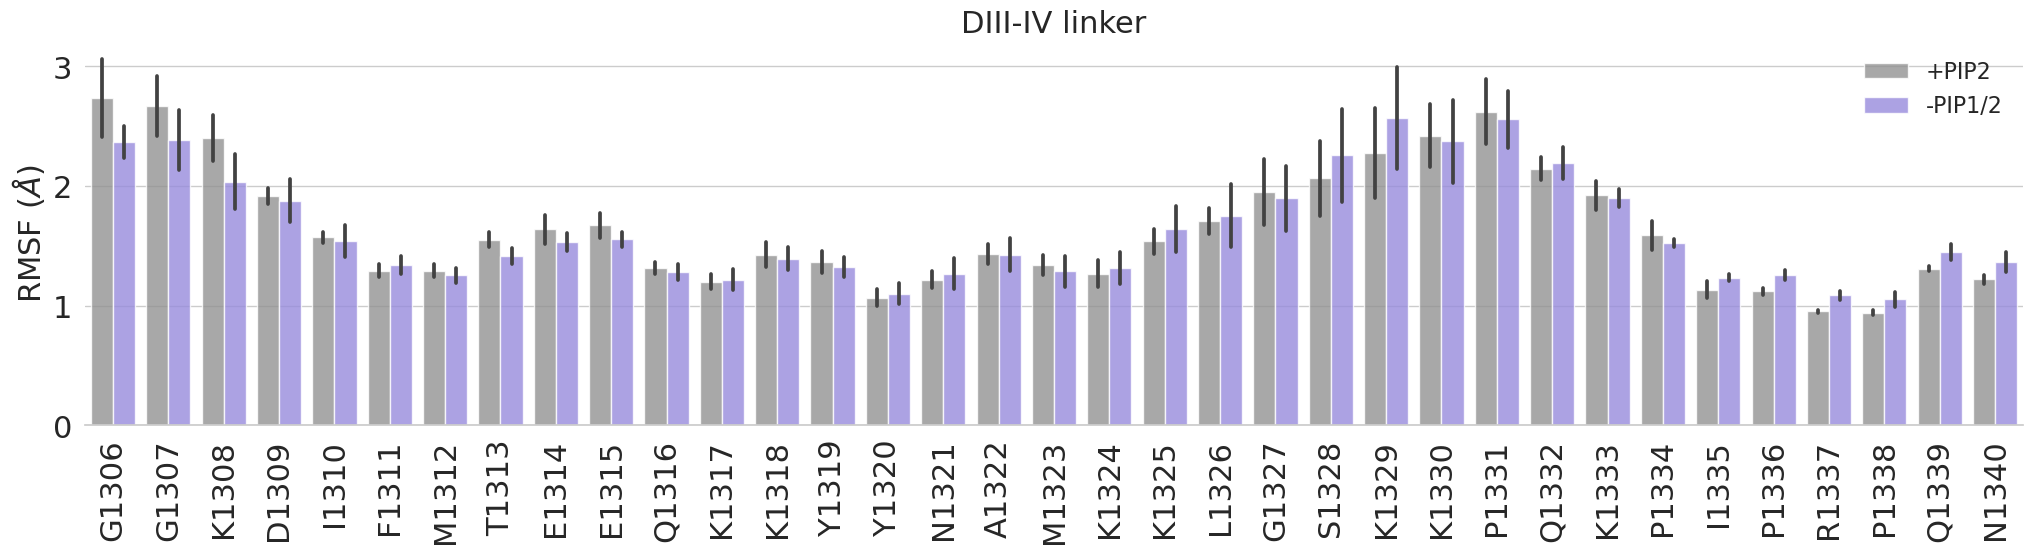

In [260]:
plot_rmsf(datBA, 830, 866, "DIII-IV linker", sig=False, pal=pal)
# plt.legend().remove()
# plt.ylim(0, 3.2)

In [145]:
datBA[datBA['PIP']=='+PIP2']

,RES,og_num,RES1,new_num,RESshort,RESID,color,rmsf,rep,PIP
0,VAL,119,VAL,1,V,V119,"(0.996, 0.797, 0.598)",4.825888,repa1,+PIP2
1,VAL,120,VAL,2,V,V120,"(0.996, 0.797, 0.598)",4.190134,repa1,+PIP2
2,ARG,121,ARG,3,R,R121,"(0.996, 0.398, 0.797)",4.051656,repa1,+PIP2
3,ARG,122,ARG,4,R,R122,"(0.996, 0.398, 0.797)",4.098681,repa1,+PIP2
4,GLY,123,GLY,5,G,G123,"(0.996, 0.797, 0.598)",4.087223,repa1,+PIP2
...,...,...,...,...,...,...,...,...,...,...
1125,PHE,1601,PHE,1126,F,F1601,"(0.598, 0.996, 0.598)",1.070445,repa5,+PIP2
1126,ASN,1602,ASN,1127,N,N1602,"(0.797, 0.797, 0.996)",1.146783,repa5,+PIP2
1127,VAL,1603,VAL,1128,V,V1603,"(0.996, 0.797, 0.598)",1.291319,repa5,+PIP2
1128,ALA,1604,ALA,1129,A,A1604,"(0.996, 0.797, 0.598)",1.819098,repa5,+PIP2


In [241]:
sns.set(font_scale=2.9)


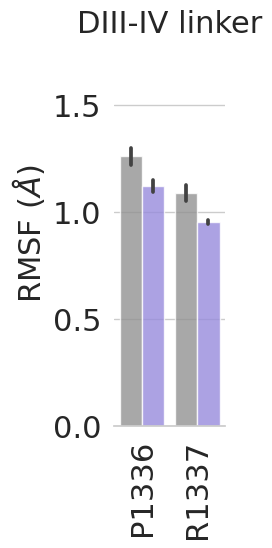

In [239]:
pal = [
#     "#7EEAC4", 
    "#929292",
    "#8E7EEA",
]
plot_rmsf(pd.concat([datBA[datBA['PIP']=='-PIP1/2'], datBA[datBA['PIP']=='+PIP2']], axis=0), 830, 866, "DIII-IV linker", sig=True, pal=pal)
plt.legend().remove()
plt.ylim(0, 1.8)

plt.savefig('d3-4_rmsf_sig.png', dpi=500, bbox_inches='tight')

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

R1337_-PIP1/2 vs. R1337_+PIP2: t-test independent samples, P_val:1.011e-02 t=3.348e+00
P1336_-PIP1/2 vs. P1336_+PIP2: t-test independent samples, P_val:2.400e-02 t=2.778e+00
[[('P1336', '-PIP1/2'), ('P1336', '+PIP2')], [('R1337', '-PIP1/2'), ('R1337', '+PIP2')]]


(0.0, 1.8)

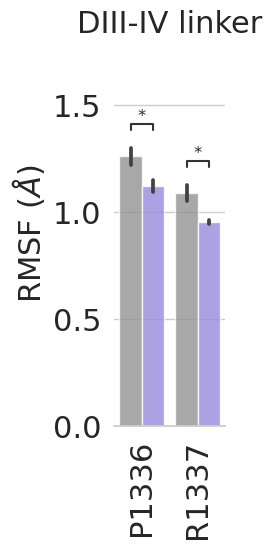

In [265]:
pal = [
#     "#7EEAC4", 
    "#929292",
    "#8E7EEA",
]
sns.set(font_scale=1.8)
sns.set_theme(style="whitegrid")
plot_rmsf_signif(pd.concat([datBA[datBA['PIP']=='-PIP1/2'], datBA[datBA['PIP']=='+PIP2']], axis=0), 860, 863, "DIII-IV linker", sig=True, pal=pal)
plt.legend().remove()
plt.ylim(0, 1.8)

# plt.savefig('d3-4_rmsf_sig.png', dpi=500, bbox_inches='tight')

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

L1472_-PIP1/2 vs. L1472_+PIP2: t-test independent samples, P_val:1.501e-02 t=3.085e+00
F1473_-PIP1/2 vs. F1473_+PIP2: t-test independent samples, P_val:1.914e-02 t=2.925e+00
A1474_-PIP1/2 vs. A1474_+PIP2: t-test independent samples, P_val:5.666e-02 t=2.226e+00
L1475_-PIP1/2 vs. L1475_+PIP2: t-test independent samples, P_val:5.338e-02 t=2.264e+00
M1476_-PIP1/2 vs. M1476_+PIP2: t-test independent samples, P_val:4.029e-02 t=2.444e+00
L1471_-PIP1/2 vs. L1471_+PIP2: t-test independent samples, P_val:1.028e-01 t=1.842e+00
G1464_-PIP1/2 vs. G1464_+PIP2: t-test independent samples, P_val:1.641e-01 t=1.532e+00
R1463_-PIP1/2 vs. R1463_+PIP2: t-test independent samples, P_val:1.778e-01 t=1.478e+00
A1465_-PIP1/2 vs. A1465_+PIP2: t-test independent samples, P_val:4.557e-02 t=2.365e+00
K1466_-PIP1/2 vs. K1466_+PIP2: t-tes

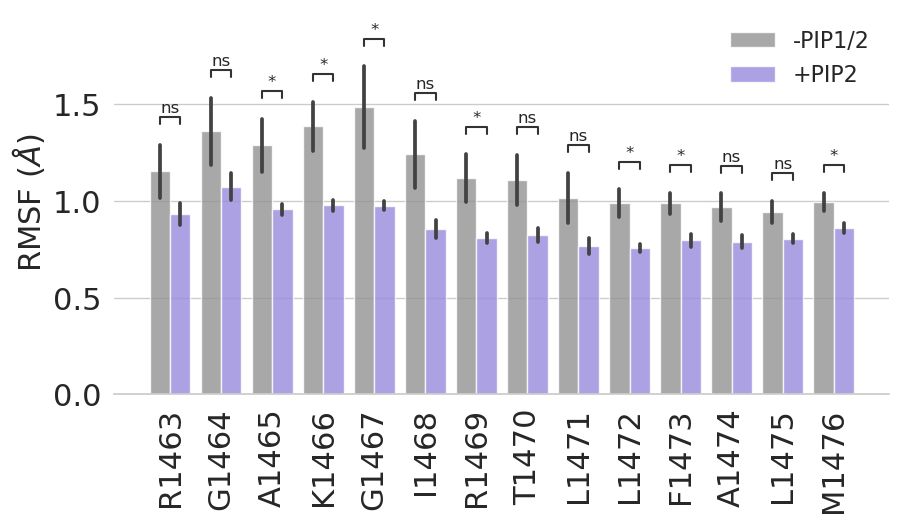

In [264]:
pal = [
#     "#7EEAC4", 
    "#929292",
    "#8E7EEA",
]
sns.set(font_scale=1.8)
sns.set_theme(style="whitegrid")
plot_rmsf_signif(pd.concat([datBA[datBA['PIP']=='-PIP1/2'], datBA[datBA['PIP']=='+PIP2']], axis=0),  987, 1002, "", sig=True, pal=pal)
# plt.legend().remove()
# plt.ylim(0, 1.8)

# plt.savefig('d3-4_rmsf_sig.png', dpi=500, bbox_inches='tight')

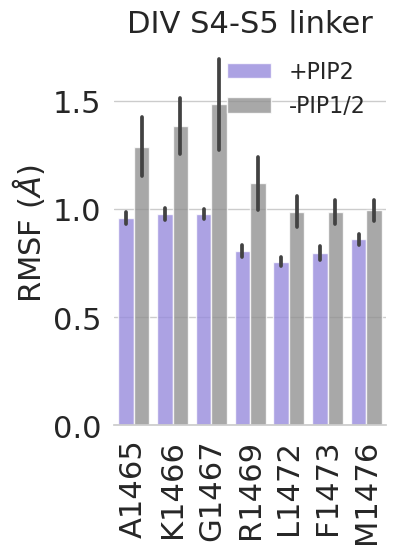

In [128]:
plot_rmsf(datBA, 987, 1002, "DIV S4-S5 linker", sig=True, pal=pal)
# plt.ylim(0, 3.2)

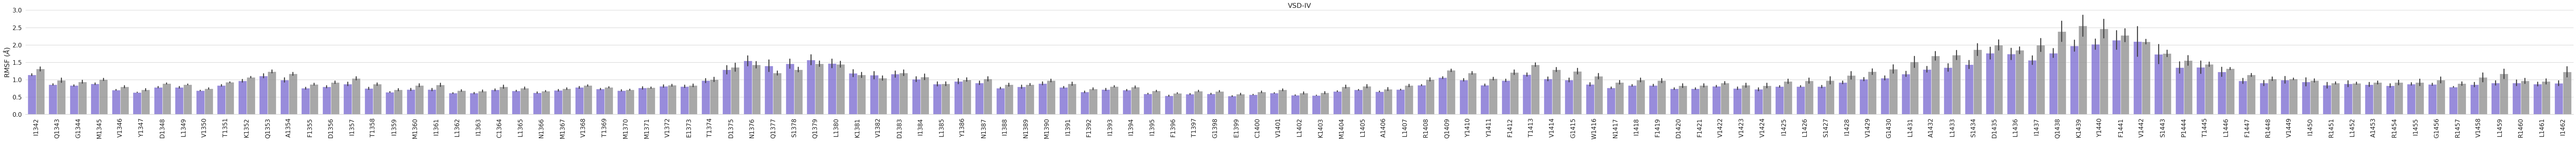

In [160]:
plot_rmsf(dat, 866, 988, "VSD-IV", sig=False)
plt.legend().remove()
# plt.ylim(0, 1.7)

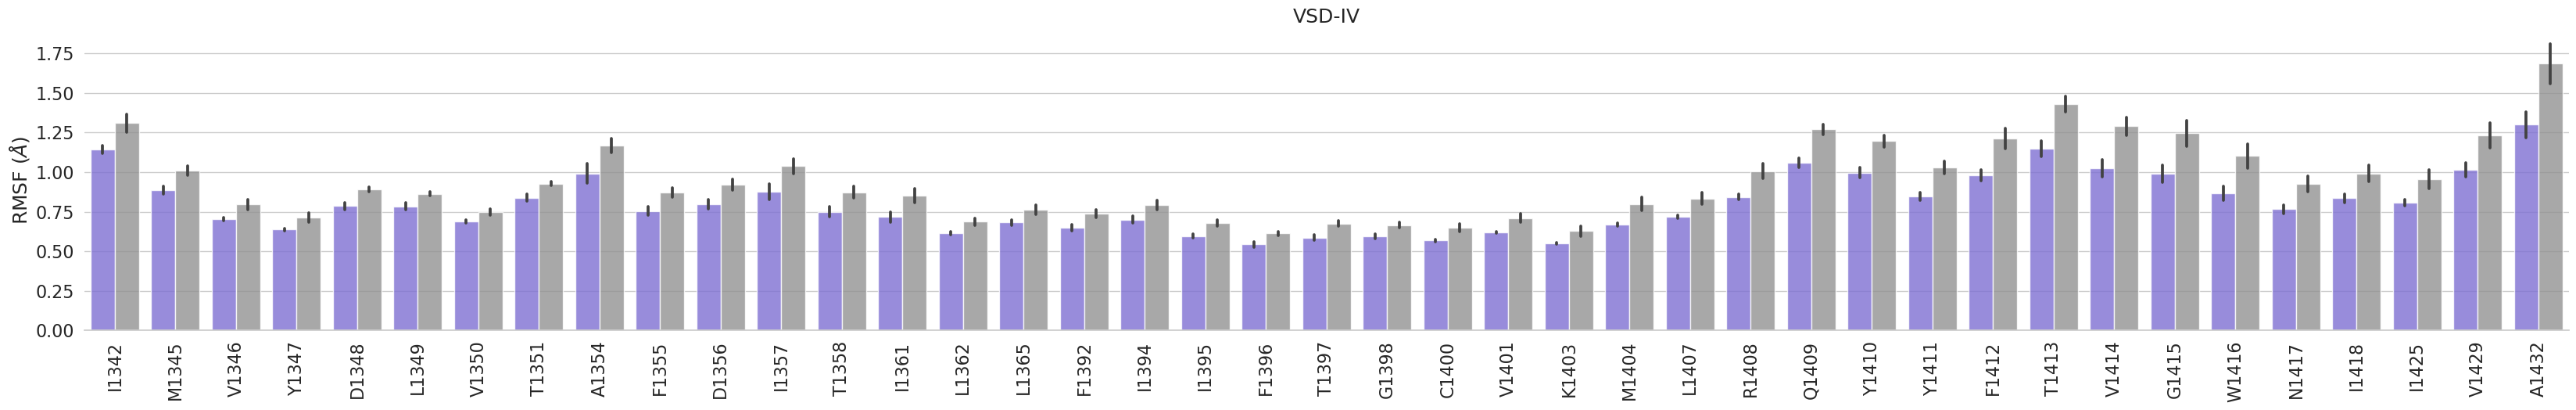

In [161]:
plot_rmsf(dat, 866, 988, "VSD-IV", sig=True)
plt.legend().remove()
# plt.ylim(0, 1.7)

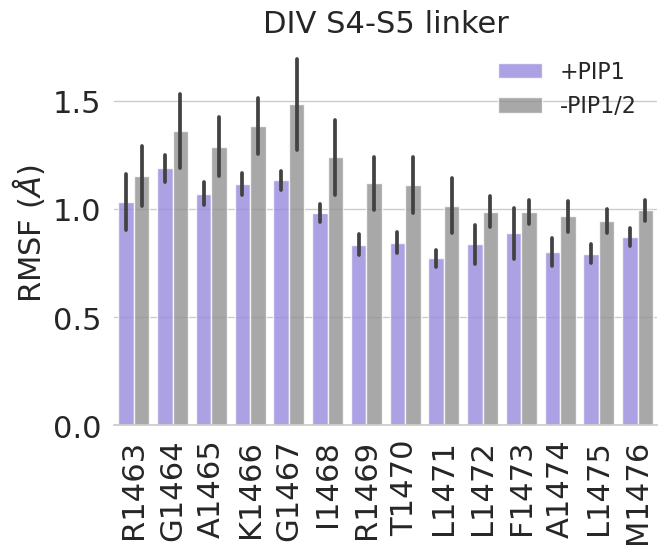

In [126]:
plot_rmsf(dat, 987, 1002, "DIV S4-S5 linker", sig=False, pal=pal)
# plt.ylim(0, 3.2)

## combined - SUPP FIGS

In [94]:
dfrmsf_combined = pd.concat([datBA, datBE[datBE['PIP']=='+PIP1']], axis=0)
dfrmsf_combined

,RES,og_num,RES1,new_num,RESshort,RESID,color,rmsf,rep,PIP
0,VAL,119,VAL,1,V,V119,"(0.996, 0.797, 0.598)",4.825888,repa1,+PIP2
1,VAL,120,VAL,2,V,V120,"(0.996, 0.797, 0.598)",4.190134,repa1,+PIP2
2,ARG,121,ARG,3,R,R121,"(0.996, 0.398, 0.797)",4.051656,repa1,+PIP2
3,ARG,122,ARG,4,R,R122,"(0.996, 0.398, 0.797)",4.098681,repa1,+PIP2
4,GLY,123,GLY,5,G,G123,"(0.996, 0.797, 0.598)",4.087223,repa1,+PIP2
...,...,...,...,...,...,...,...,...,...,...
1125,PHE,1601,PHE,1126,F,F1601,"(0.598, 0.996, 0.598)",1.150247,repa5,+PIP1
1126,ASN,1602,ASN,1127,N,N1602,"(0.797, 0.797, 0.996)",1.378241,repa5,+PIP1
1127,VAL,1603,VAL,1128,V,V1603,"(0.996, 0.797, 0.598)",1.603425,repa5,+PIP1
1128,ALA,1604,ALA,1129,A,A1604,"(0.996, 0.797, 0.598)",1.870962,repa5,+PIP1


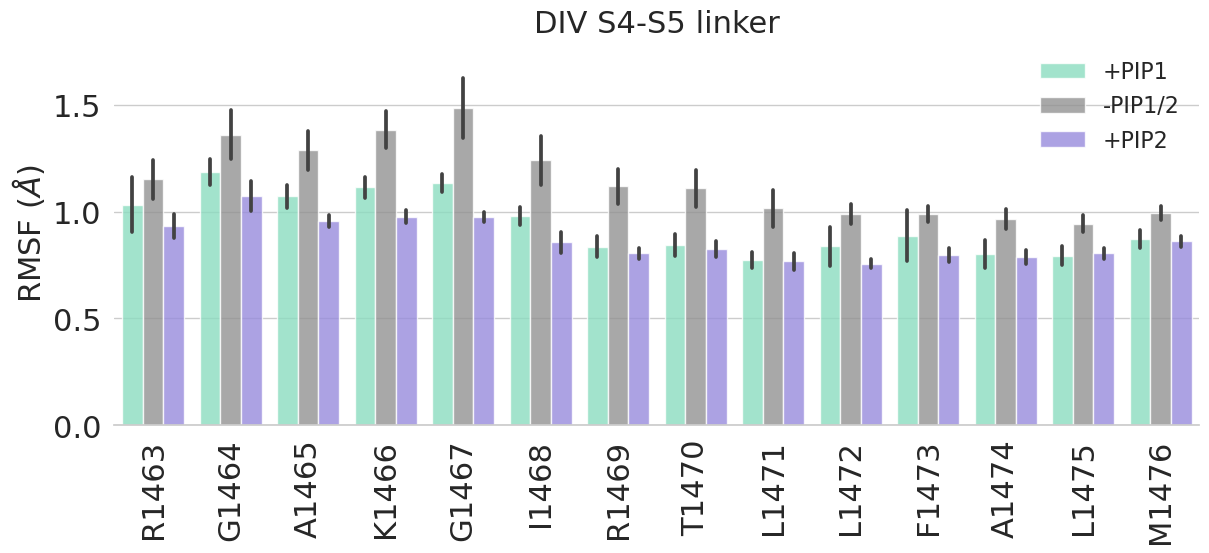

In [136]:
pal = [
    "#7EEAC4", 
    "#929292",
    "#8E7EEA"
]
plot_rmsf(pd.concat([datBE, datBA], axis=0), 987, 1002, "DIV S4-S5 linker", sig=False, pal=pal)

plt.ylim(0,1.8)

plt.savefig('s4s5_combinedpips_rmsf_sig.png', dpi=500, bbox_inches='tight')

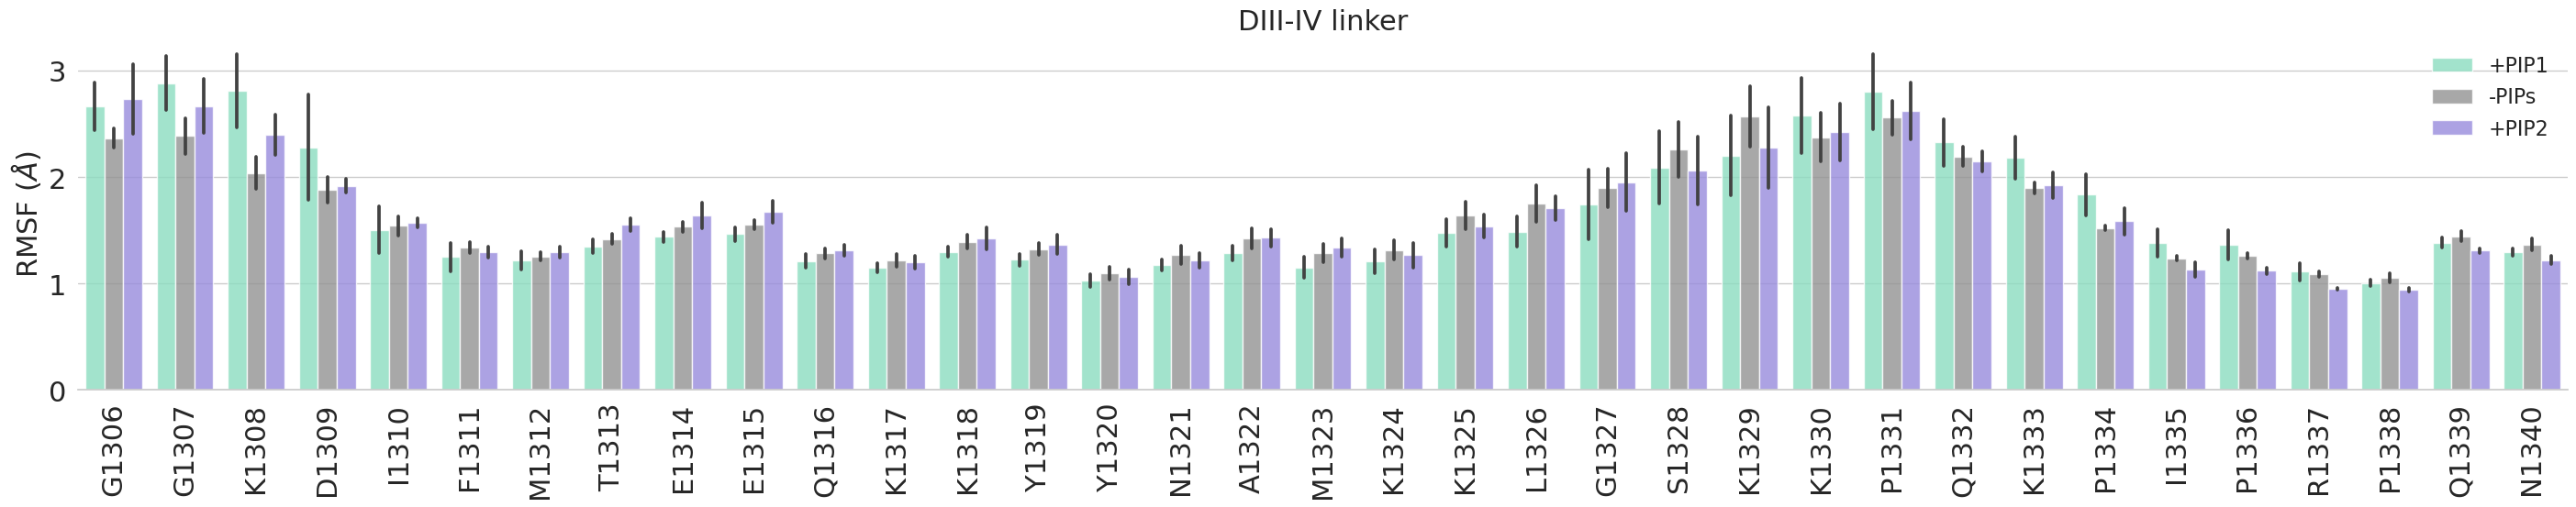

In [88]:
pal = [
    "#7EEAC4", 
    "#929292",
    "#8E7EEA"
]
plot_rmsf(pd.concat([datBE, datBA], axis=0), 830, 866, "DIII-IV linker", sig=False, pal=pal)

plt.savefig('d3-4_combinedpips_rmsf_sig.png', dpi=500, bbox_inches='tight')

In [67]:
vdf[vdf['PIP']=='+PIP2']['rmsf'].mean() - vdf[vdf['PIP']=='-PIP2']['rmsf'].mean()

1.4154025171329416

In [68]:
# ttest_ind(vdf[vdf['PIP']=='+PIP2']['rmsf'])
vdf[vdf['PIP']=='+PIP2']['rmsf'] 

1129    4.693939
1129    5.026491
1129    2.882831
Name: rmsf, dtype: float64

In [167]:
t=[]
for i in np.unique(dat['og_num']):
#     if vdf[vdf['PIP']=='+PIP2']['rmsf'].mean() < vdf[vdf['PIP']=='-PIP2']['rmsf'].mean():
    vdf = dat[dat['og_num']==i]
    t.append(ttest_ind(vdf[vdf['PIP']=='+PIP2']['rmsf'], vdf[vdf['PIP']=='-PIP2']['rmsf'])[1])
    
df=pd.DataFrame(t,index=np.unique(dat['og_num']), columns=['stat'])
' '.join(list(df[df['stat']<0.05].index.astype(str)))
# sig = list(df[df['stat']<0.05].index.astype(int))

'237 238 241 242 245 246 247 248 249 250 251 252 253 254 255 256 257 384 405 406 407 409 410 441 442 445 448 563 564 565 566 567 568 569 570 571 572 573 574 575 576 577 578 579 580 581 583 584 586 587 588 590 591 592 593 594 595 596 597 598 599 600 601 602 603 604 605 606 607 608 609 610 611 612 613 614 615 616 617 618 619 620 621 622 623 624 625 626 627 628 629 630 631 632 633 634 635 636 637 638 639 640 641 642 643 644 645 646 647 648 649 650 651 652 653 654 655 657 658 659 672 674 675 676 677 678 679 690 693 694 702 707 708 709 710 711 712 713 714 715 716 717 718 719 743 744 745 746 747 748 749 750 751 752 753 754 755 756 757 765 783 784 1177 1178 1179 1180 1181 1182 1183 1184 1185 1186 1187 1188 1189 1203 1204 1205 1206 1207 1219 1220 1221 1222 1223 1226 1227 1228 1229 1230 1233 1236 1237 1239 1240 1241 1242 1243 1244 1245 1246 1247 1248 1249 1250 1251 1252 1253 1254 1255 1256 1257 1267 1268 1269 1270 1271 1272 1273 1274 1275 1276 1277 1278 1279 1280 1281 1336 1337 1342 1345 1346 1

In [70]:
dfrmsf[dfrmsf["og_num"].isin(list(df[df['stat']<0.05].index))]

NameError: name 'dfrmsf' is not defined

In [71]:
dat 

,RES,og_num,RES1,new_num,RESshort,RESID,color,rmsf,rep,PIP
0,VAL,119,VAL,1,V,V119,"(0.996, 0.797, 0.598)",5.689052,repa2,+PIP2
1,VAL,120,VAL,2,V,V120,"(0.996, 0.797, 0.598)",5.373329,repa2,+PIP2
2,ARG,121,ARG,3,R,R121,"(0.996, 0.398, 0.797)",5.190283,repa2,+PIP2
3,ARG,122,ARG,4,R,R122,"(0.996, 0.398, 0.797)",5.288359,repa2,+PIP2
4,GLY,123,GLY,5,G,G123,"(0.996, 0.797, 0.598)",5.186468,repa2,+PIP2
...,...,...,...,...,...,...,...,...,...,...
1125,PHE,1601,PHE,1126,F,F1601,"(0.598, 0.996, 0.598)",1.764411,repb4,-PIP2
1126,ASN,1602,ASN,1127,N,N1602,"(0.797, 0.797, 0.996)",1.975986,repb4,-PIP2
1127,VAL,1603,VAL,1128,V,V1603,"(0.996, 0.797, 0.598)",2.212553,repb4,-PIP2
1128,ALA,1604,ALA,1129,A,A1604,"(0.996, 0.797, 0.598)",3.209960,repb4,-PIP2


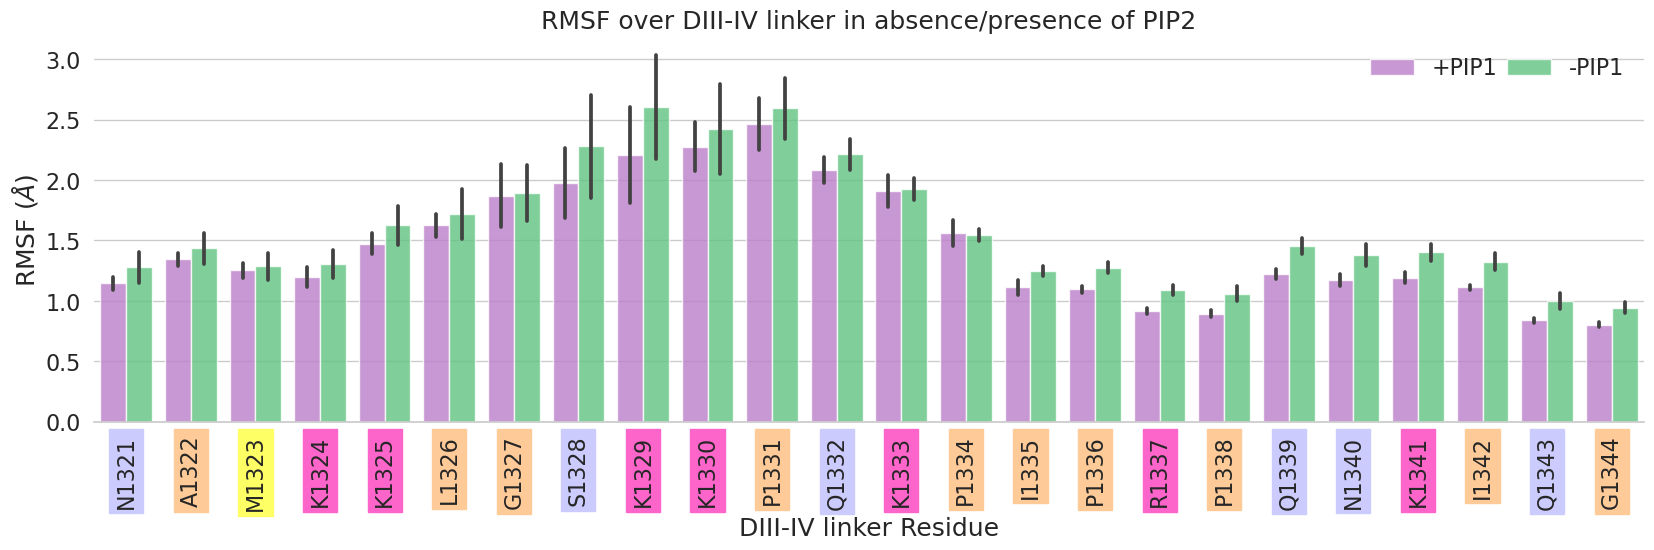

In [440]:
dat = dfrmsf[(dfrmsf.new_num > 845) & (dfrmsf.new_num < 870)]

sns.set(font_scale=1.7)
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(figsize=(20, 5))

sns.barplot(
    data=dat, #kind="bar",
    x="RESID", y="rmsf", ax=ax, hue="PIP",
    alpha=.8, palette=pal, errorbar='se'
)
sns.despine(left=True)
plt.xlabel('DIII-IV linker Residue', fontsize=18)
plt.ylabel('RMSF ($\AA$)', fontsize=18)
plt.title('RMSF over DIII-IV linker in absence/presence of PIP2', fontsize=18)
plt.legend(loc="upper right", ncol=3, columnspacing=0.4, frameon=False, fontsize=16)
plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
ax.tick_params(axis='both', labelsize=16)  # Set the tick label size
# ax.set_xlabel('Category', fontsize=18)  # Set the x-axis label size
# ax.set_ylabel('Value', fontsize=18)  # Set the y-axis label size
# ax.set_title('Bar Plot with Larger Text', fontsize=18)  # Set the title size
for tl in ax.get_xticklabels():
    txt = tl.get_text()
#     print(txt, type(resnew.set_index('resname').loc[txt]['color']))
    if type(dat.set_index('RESID').loc[txt]['color']) == str:
        tl.set_backgroundcolor(dat.set_index('RESID').loc[txt]['color'])
    else:
        tl.set_backgroundcolor(dat.set_index('RESID').loc[txt]['color'].unique()[0])
        
# plt.savefig(pipdir + 'rmsf_combined_IFM.png', dpi=500)